In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_-_Historical.csv")

In [3]:
df.head().T

,0,1,2,3,4
ZIP Code,60622,60622,60622,60622,60622
Week Number,31,32,33,34,35
Week Start,07/26/2020,08/02/2020,08/09/2020,08/16/2020,08/23/2020
Week End,08/01/2020,08/08/2020,08/15/2020,08/22/2020,08/29/2020
Cases - Weekly,28.0,34.0,41.0,42.0,45.0
Cases - Cumulative,877.0,911.0,952.0,994.0,1039.0
Case Rate - Weekly,53.0,64.0,78.0,80.0,85.0
Case Rate - Cumulative,1661.2,1725.6,1803.3,1882.8,1968.1
Tests - Weekly,1329.0,1405.0,1542.0,1674.0,1540.0
Tests - Cumulative,13148,14553,16095,17769,19309


Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              13132 non-null  object 
 1   Week Number                           13132 non-null  int64  
 2   Week Start                            13132 non-null  object 
 3   Week End                              13132 non-null  object 
 4   Cases - Weekly                        12909 non-null  float64
 5   Cases - Cumulative                    12909 non-null  float64
 6   Case Rate - Weekly                    12909 non-null  float64
 7   Case Rate - Cumulative                12909 non-null  float64
 8   Tests - Weekly                        12740 non-null  float64
 9   Tests - Cumulative                    13132 non-null  int64  
 10  Test Rate - Weekly                    13132 non-null  int64  
 11  Test Rate - Cum

Chaning col names 

In [5]:
def colname(df):
    return df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('__', '_').str.lower()
df.columns = colname(df)
df.columns = df.columns.str.replace('__', '_')
df.columns

Index(['zip_code', 'week_number', 'week_start', 'week_end', 'cases_weekly',
       'cases_cumulative', 'case_rate_weekly', 'case_rate_cumulative',
       'tests_weekly', 'tests_cumulative', 'test_rate_weekly',
       'test_rate_cumulative', 'percent_tested_positive_weekly',
       'percent_tested_positive_cumulative', 'deaths_weekly',
       'deaths_cumulative', 'death_rate_weekly', 'death_rate_cumulative',
       'population', 'row_id', 'zip_code_location'],
      dtype='object')

Checking unique values and its count for specific values

In [6]:
unique = ['zip_code', 'week_number', 'zip_code_location']
for col in unique:
    print(df[col].value_counts())
    print()

zip_code
60622      219
60640      219
60623      219
60614      219
60638      219
60666      219
60604      219
60653      219
60644      219
60616      219
60617      219
60621      219
60637      219
60639      219
60643      219
60609      219
60652      219
60655      219
60656      219
60608      219
60659      219
60605      219
60620      219
60707      219
60613      219
60606      219
60645      219
60649      219
60634      219
60633      219
60632      219
60631      219
60615      219
60610      219
60619      219
60607      219
60624      219
60625      219
60626      219
60628      219
60629      219
60612      219
60654      219
60618      219
60636      219
60651      219
60657      219
60660      219
60611      219
60601      219
60602      219
60641      219
60646      219
60827      219
60661      219
60603      219
60642      219
60630      219
60647      219
Unknown    211
Name: count, dtype: int64

week_number
16    300
13    300
17    300
18    300
10    300
19

Checking for null values

In [7]:
np.sum(df.isna(), axis = 0)

zip_code                                0
week_number                             0
week_start                              0
week_end                                0
cases_weekly                          223
cases_cumulative                      223
case_rate_weekly                      223
case_rate_cumulative                  223
tests_weekly                          392
tests_cumulative                        0
test_rate_weekly                        0
test_rate_cumulative                    0
percent_tested_positive_weekly          0
percent_tested_positive_cumulative      0
deaths_weekly                           0
deaths_cumulative                       0
death_rate_weekly                       0
death_rate_cumulative                   0
population                              0
row_id                                  0
zip_code_location                     211
dtype: int64

In [8]:
df = df.fillna({"zip_code_location" : "Unknown"})
interpolate_cols = ['cases_weekly', 'cases_cumulative', 'case_rate_weekly', 'case_rate_cumulative']
df[interpolate_cols] = df[interpolate_cols].interpolate(method = 'linear')
df = df.dropna()

In [9]:
np.sum(df.isna(), axis = 0)

zip_code                              0
week_number                           0
week_start                            0
week_end                              0
cases_weekly                          0
cases_cumulative                      0
case_rate_weekly                      0
case_rate_cumulative                  0
tests_weekly                          0
tests_cumulative                      0
test_rate_weekly                      0
test_rate_cumulative                  0
percent_tested_positive_weekly        0
percent_tested_positive_cumulative    0
deaths_weekly                         0
deaths_cumulative                     0
death_rate_weekly                     0
death_rate_cumulative                 0
population                            0
row_id                                0
zip_code_location                     0
dtype: int64

Describe

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week_number,12740.0,26.151805,14.853410,1.0,13.000,25.00,39.000,53.0
cases_weekly,12740.0,64.700863,122.033668,0.0,12.000,32.00,71.625,2212.0
cases_cumulative,12740.0,8498.512873,7531.988537,5.0,2155.000,6934.00,13025.750,36570.0
case_rate_weekly,12740.0,140.065699,248.471755,0.0,34.000,79.00,154.000,6266.0
case_rate_cumulative,12740.0,18049.167959,11911.295439,0.0,7638.375,20119.85,27721.000,64450.1
tests_weekly,12740.0,1225.955024,1400.608932,0.0,158.000,835.50,1807.250,13173.0
tests_cumulative,12740.0,133910.108320,135352.525404,0.0,12294.250,91784.50,227235.750,538868.0
test_rate_weekly,12740.0,2759.721743,3255.136213,0.0,463.000,2029.50,3885.250,75755.0
test_rate_cumulative,12740.0,304681.954027,293114.179981,0.0,38119.275,254854.85,498956.225,2037212.0
percent_tested_positive_weekly,12740.0,0.058030,0.079448,0.0,0.000,0.00,0.100,1.0


Making percent values in terms of 100%

In [11]:
percent_col = ['percent_tested_positive_weekly', 'percent_tested_positive_cumulative']
df[percent_col] = df[percent_col] * 100

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week_number,12740.0,26.151805,14.853410,1.0,13.000,25.00,39.000,53.0
cases_weekly,12740.0,64.700863,122.033668,0.0,12.000,32.00,71.625,2212.0
cases_cumulative,12740.0,8498.512873,7531.988537,5.0,2155.000,6934.00,13025.750,36570.0
case_rate_weekly,12740.0,140.065699,248.471755,0.0,34.000,79.00,154.000,6266.0
case_rate_cumulative,12740.0,18049.167959,11911.295439,0.0,7638.375,20119.85,27721.000,64450.1
tests_weekly,12740.0,1225.955024,1400.608932,0.0,158.000,835.50,1807.250,13173.0
tests_cumulative,12740.0,133910.108320,135352.525404,0.0,12294.250,91784.50,227235.750,538868.0
test_rate_weekly,12740.0,2759.721743,3255.136213,0.0,463.000,2029.50,3885.250,75755.0
test_rate_cumulative,12740.0,304681.954027,293114.179981,0.0,38119.275,254854.85,498956.225,2037212.0
percent_tested_positive_weekly,12740.0,5.802983,7.944809,0.0,0.000,0.00,10.000,100.0


Grouping by weekly_number to draw insights

In [13]:
numeric_col = df.select_dtypes('number').columns
df_wn = df.groupby('week_number').agg({'week_number' : 'size', **{col : ['mean', 'sum'] for col in numeric_col if col!= 'week_number' }})
df_wn = df_wn.rename(columns = {'week_number' : "week_number_count"})
df_wn = df_wn.reset_index()
df_wn

week_number week_number_count cases_weekly               cases_cumulative  \
                            size         mean           sum             mean   
0            1               174   311.445402  54191.500000      8729.571839   
1            2               231   148.662338  34341.000000      9893.603896   
2            3               232    91.644397  21261.500000      9999.616379   
3            4               231    62.696970  14483.000000     10038.852814   
4            5               232    45.489224  10553.500000     10069.015086   
5            6               232    38.258621   8876.000000     10191.032328   
6            7               231    31.601732   7300.000000     10154.538240   
7            8               232    28.769397   6674.500000     10185.394397   
8            9               231    26.242424   6062.000000     10256.874459   
9           10               292    28.582192   8346.000000      9702.714612   
10          11               291    29.873139   8693.083333      9486.766896   
11          12               291    30.704467   8935.000000      8588.132302   
12          13               292    38.190925  11151.750000      8395.434932   
13          14               291    43.299542  12600.166667      8299.034937   
14          15               291    45.568729  13260.500000      8428.422680   
15          16               292    46.979452  13718.000000      8393.811644   
16          17               292    56.988014  16640.500000      8440.279110   
17          18               292    63.873288  18651.000000      8476.695205   
18          19               292    62.866438  18357.000000      8555.380137   
19          20               292    54.196918  15825.500000      8593.138699   
20          21               234    58.908120  13784.500000      7280.688034   
21          22               234    47.662393  11153.000000      7348.391026   
22          23               234    37.053419   8670.500000      7391.544872   
23          24               234    30.096154   7042.500000      7403.905983   
24          25               234    33.365385   7807.500000      7523.547009   
25          26               234    33.245726   7779.500000      7472.064103   
26          27               234    31.946581   7475.500000      7569.880342   
27          28               234    38.160256   8929.500000      7570.267094   
28          29               234    41.363248   9679.000000      7683.264957   
29          30               234    43.527778  10185.500000      7668.025641   
30          31               234    46.967949  10990.500000      7682.487179   
31          32               234    47.940883  11218.166667      7799.212963   
32          33               232    46.915948  10884.500000      7811.971983   
33          34               232    49.280172  11433.000000      7894.142241   
34          35               232    48.506466  11253.500000      7909.879310   
35          36               232    43.683190  10134.500000      8007.663793   
36          37               232    38.463362   8923.500000      8059.721983   
37          38               232    35.880747   8324.333333      8026.859195   
38          39               232    34.586207   8024.000000      8059.696121   
39          40               232    33.769397   7834.500000      8140.066810   
40          41               232    37.351293   8665.500000      8150.418103   
41          42               232    45.495690  10555.000000      8195.825431   
42          43               232    57.079741  13242.500000      8247.230603   
43          44               232    73.198276  16982.000000      8322.265086   
44          45               232    97.021552  22509.000000      8399.185345   
45          46               232   111.006466  25753.500000      8522.107759   
46          47               232    93.698276  21738.000000      8618.474138   
47          48               232    98.230603  22789.500000      8745.047414   
48 

Line Chart of week number and total cases weekly

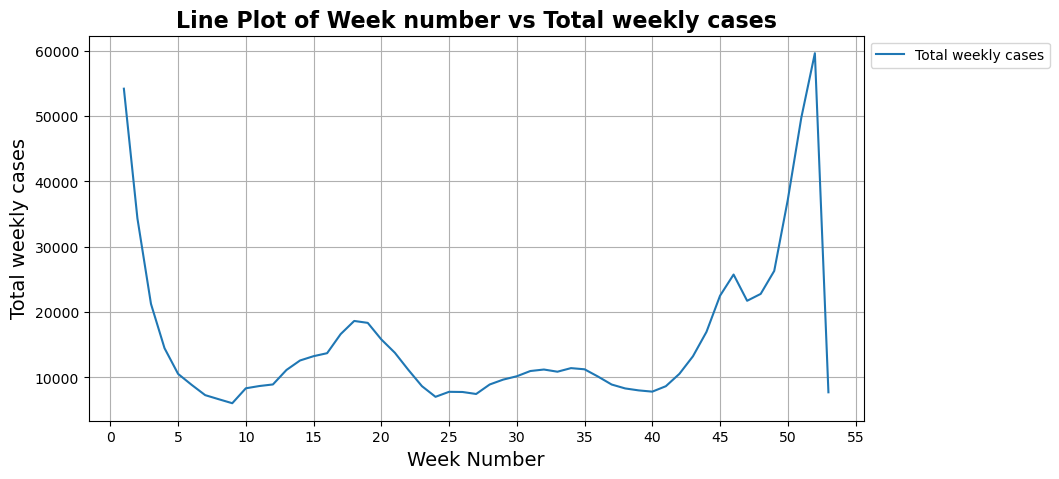

In [14]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'week_number', y = ('cases_weekly', 'sum'), data = df_wn, label = 'Total weekly cases')
plt.title("Line Plot of Week number vs Total weekly cases", fontweight = 'bold', fontsize = 16)
plt.xlabel("Week Number", fontsize = 14)
plt.ylabel("Total weekly cases", fontsize = 14)
plt.legend(bbox_to_anchor = (1, 1))
plt.xticks(ticks = np.arange(0, 56, 5))
plt.grid()
plt.show()

Line plot of week number vs total weeky tests

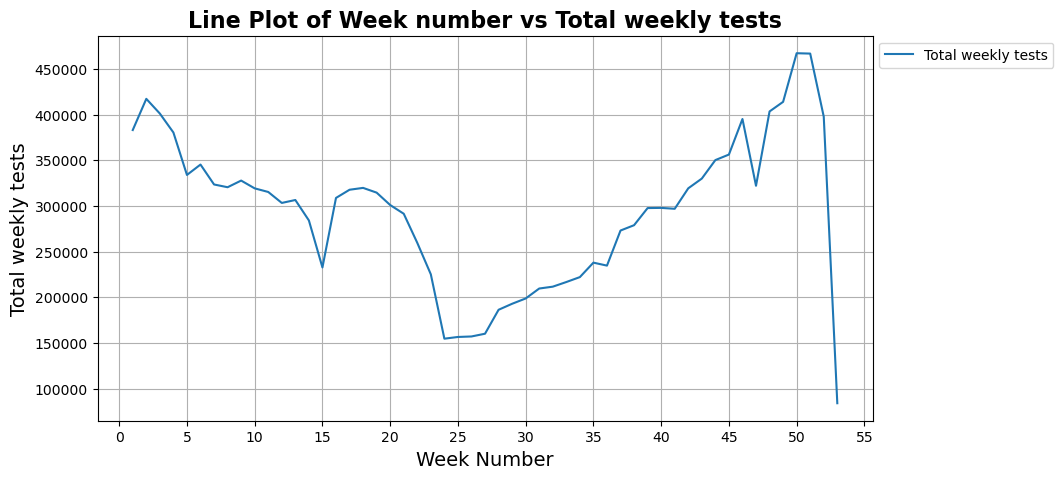

In [15]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'week_number', y = ('tests_weekly', 'sum'), data = df_wn, label = 'Total weekly tests')
plt.title("Line Plot of Week number vs Total weekly tests", fontweight = 'bold', fontsize = 16)
plt.xlabel("Week Number", fontsize = 14)
plt.ylabel("Total weekly tests", fontsize = 14)
plt.legend(bbox_to_anchor = (1, 1))
plt.xticks(ticks = np.arange(0, 56, 5))
plt.grid()
plt.show()

Scatter plot of weekly Tests and Weekly Cases

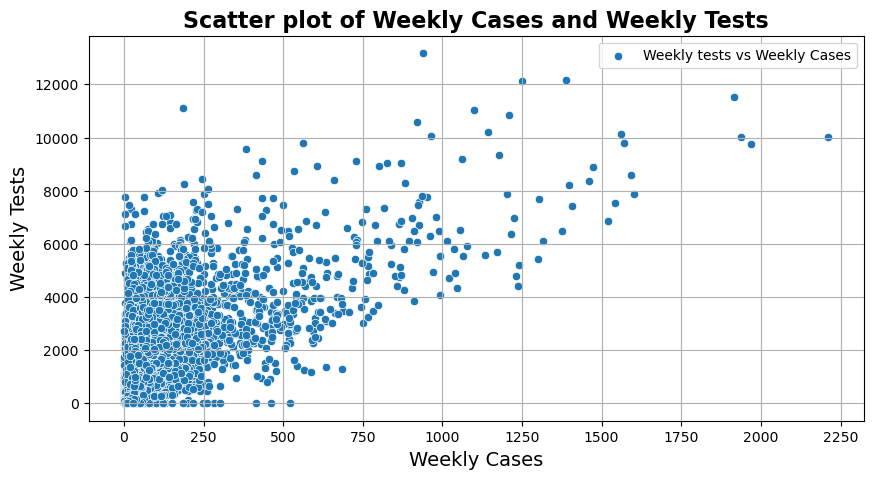

In [16]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'cases_weekly', y = 'tests_weekly', data = df, label = 'Weekly tests vs Weekly Cases')
plt.title("Scatter plot of Weekly Cases and Weekly Tests", fontsize = 16, fontweight = 'bold')
plt.xlabel("Weekly Cases", fontsize = 14)
plt.ylabel("Weekly Tests", fontsize = 14)
plt.legend(bbox_to_anchor = (1, 1))
plt.xticks(ticks = np.arange(0, 2251, 250))
plt.grid()
plt.show()

Line Chart of weekly death by week number

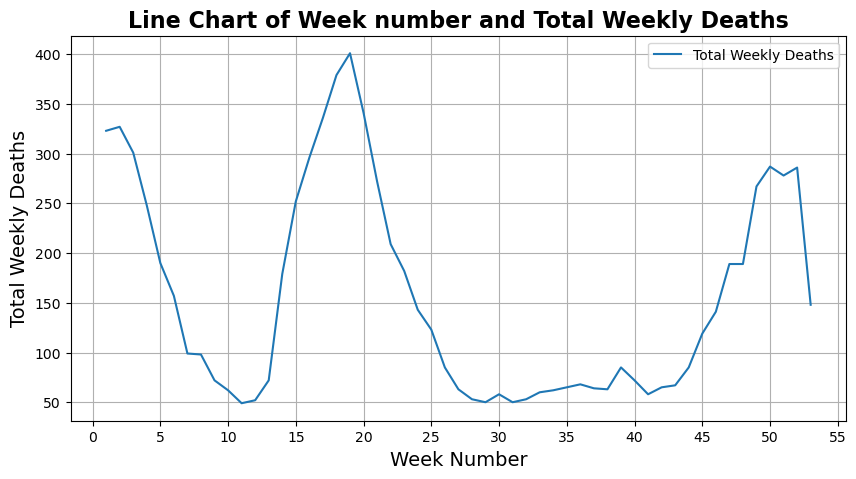

In [17]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'week_number', y = ('deaths_weekly', 'sum'), data = df_wn, label = 'Total Weekly Deaths')
plt.title("Line Chart of Week number and Total Weekly Deaths", fontsize = 16, fontweight = 'bold')
plt.xlabel("Week Number", fontsize = 14)
plt.ylabel("Total Weekly Deaths", fontsize = 14)
plt.xticks(np.arange(0, 56, 5))
plt.legend(bbox_to_anchor = (1, 1))
plt.grid()
plt.show()

Getting top 5 week with most deaths

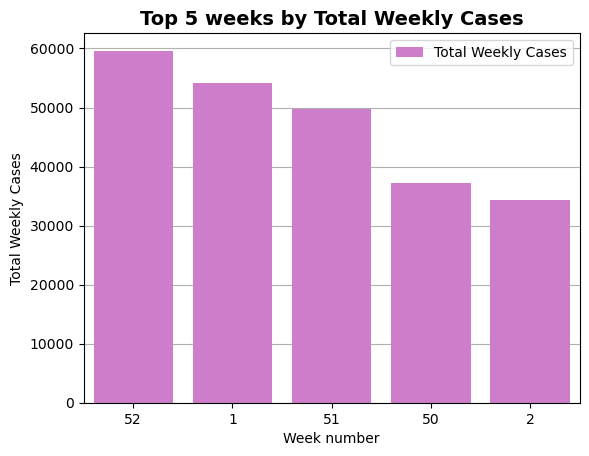

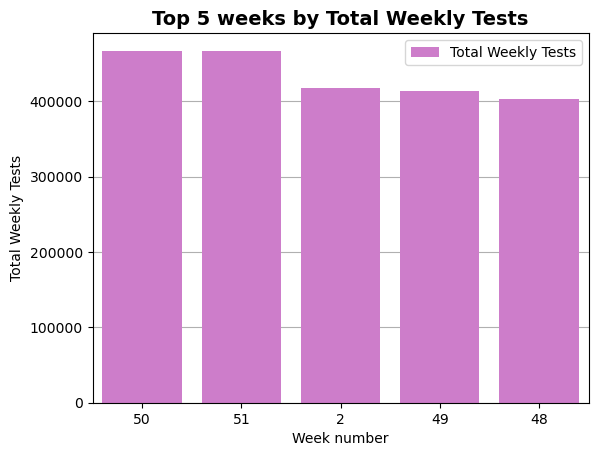

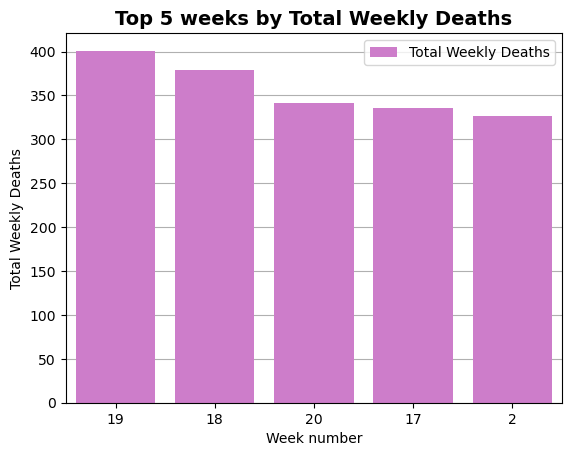

In [18]:
top5 = {'cases_weekly' : "Cases", 'tests_weekly' : "Tests", 'deaths_weekly' : "Deaths"}
for col in top5.keys():
    df5 = df_wn.nlargest(5, (col, 'sum'))
    xorder = df5['week_number']

    barplot = sns.barplot(x = 'week_number', y = (col, 'sum'), data = df5, color = 'orchid', label = f'Total Weekly {top5[col]}', order = xorder)
    plt.title(f"Top 5 weeks by Total Weekly {top5[col]}", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Week number")
    plt.ylabel(f"Total Weekly {top5[col]}")
    plt.legend(bbox_to_anchor = (1, 1))
    plt.grid(axis = 'y')
    barplot.set_axisbelow(True)
    plt.show()
    print()


Checking Correlation

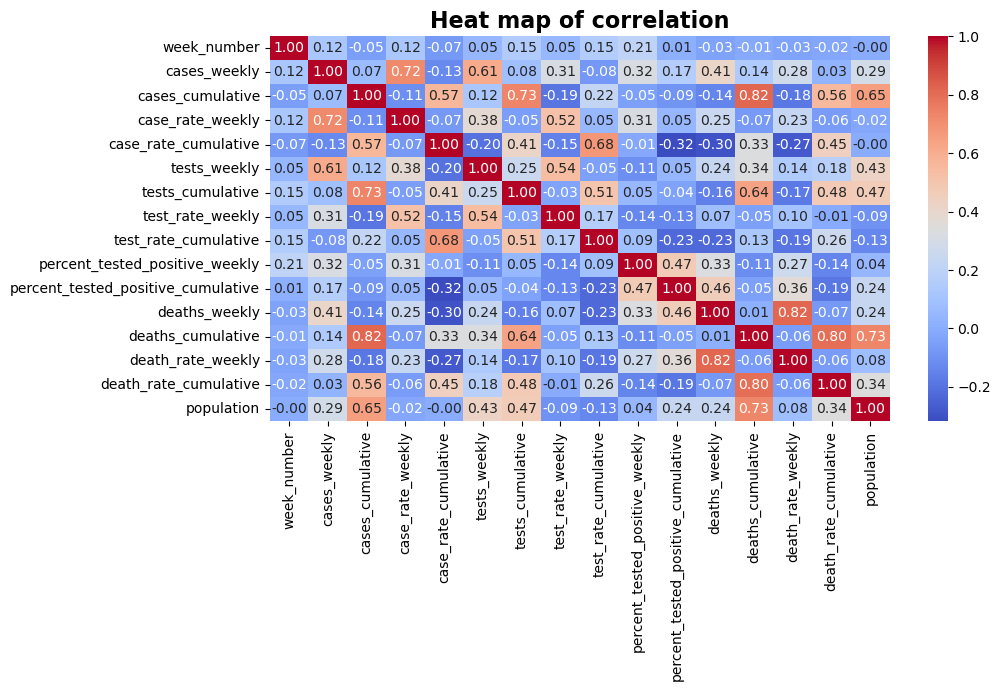

In [19]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = '.2f', linecolor = 'black')
plt.title("Heat map of correlation", fontsize = 16, fontweight = 'bold')
plt.show()